---
authors:
  - name: Tom Siegl
---

# 05: Linear Regression

## Linear Functions and Errors

You might remember a linear function of the form

$$y = mx+n$$

from school.
It has one argument, $x$, and two constants, $m$ for the slope and $n$ for the intersection with the $y$-axis.

This is what it looks like when we plot it:

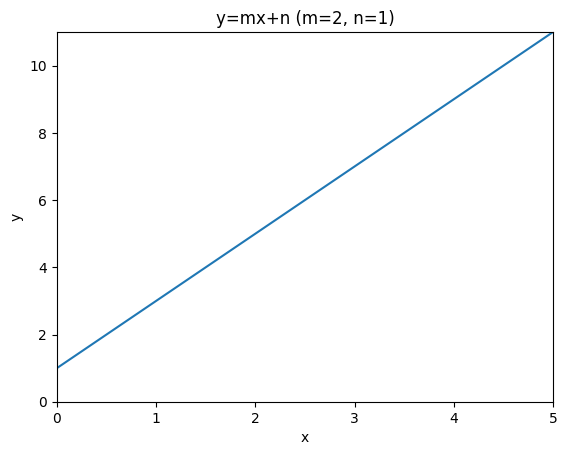

In [19]:
################################
# RUN, THEN COLLAPSE THIS CELL #
################################

import matplotlib.pyplot as plt

m = 2
n = 1

f = lambda x: m*x+n

plt.plot([0, 5], [f(0), f(5)])
plt.xlim(0, 5)
plt.ylim(0, f(5))
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"y=mx+n (m={m}, n={n})")
plt.show()

A linear regression model for a single independent variable is actually the same function, we just write it a little differently as 

$$\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} \cdot x_i.$$

As a linear regression model, this function does not stand alone, but it comes with a dataset $\{(x_i, y_i) \in \mathbb{R}^2\}_{i=1}^{n}$, that it is fitted to.
Fitting here means to select the constants $\hat{\beta_0}$ and $\hat{\beta_1}$, such that the $\hat{y_i}$ is as close to $y_i$ as possible for all $i \in \{1, \dots, n\}$.

In this setting, we call $x$ the independent variable and $y$ the dependent variable, because we assume that its values depend on the values of $x$.
We say that $\hat{y}$ is an estimate of $y$ for any given value of $x$.
Note that the linear regression model does so using only linear operations on $x$.

The following code (skip the plotting function) demonstrates how easy it is to obtain a fitted linear regression model using sklearn given some data.
You can see that the resulting model is really just the linear function you know from school time.
Feel free to temper with the values of `model.coef_` and `model.intercept_` after fitting, to see how the plot and the RSS change.

In [20]:
################################
# RUN, THEN COLLAPSE THIS CELL #
################################

import numpy as np


def plot_iris_model(model, X, y, y_pred, ax):
    # sort X, y and y_pred by X
    sort_idx = np.argsort(X[:, 0])
    X = X[sort_idx, :]
    y = y[sort_idx]
    y_pred = y_pred[sort_idx]
    
    # Plot data and fitted line
    ax.plot(X, y_pred, color="blue", alpha=0.7, label=f"$y={model.coef_[0]:.2f}x+{model.intercept_:.2f}$")
    ax.scatter(X, y, label="Data", color="red", alpha=0.5, zorder=10)

    # Plot residuals
    for i in range(len(X)):
        ax.vlines(X[i], y_pred[i], y[i], color="gray", alpha=0.5, zorder=-10)
    
    ax.set_xlabel("Sepal width (cm)")
    ax.set_ylabel("Petal length (cm)")
    ax.set_title("Linear Fit: Petal Length vs Sepal Width")
    ax.legend()

RSS = 49.76


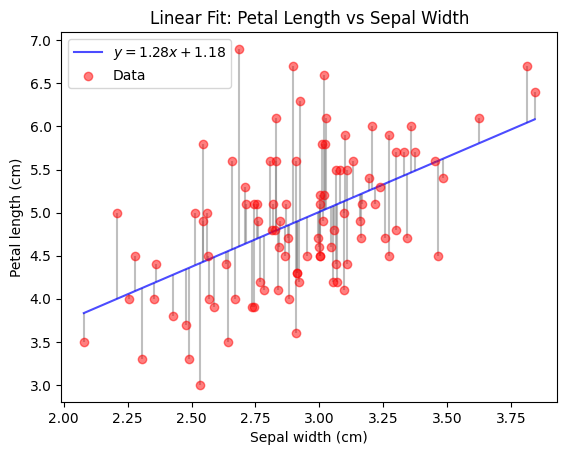

In [21]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression


def RSS(y, y_pred):
    return np.sum(np.square(y-y_pred))


np.random.seed(0)

# Load iris data and select values for species Iris-Versicolour and Iris-Virginica
iris = load_iris()
X = iris.data[50:, 1].reshape(-1, 1)  # sepal width
X += np.random.random(X.shape)*0.1    # add some noise for better plotting
y = iris.data[50:, 2]                 # petal length

# Fit linear model
model = LinearRegression()
model.fit(X, y)

# Try some other values here and see how that changes the model and the RSS below.
# model.coef_ = np.array([2.])
# model.intercept_ = 1.

y_pred = model.predict(X)
print(f"RSS = {RSS(y, y_pred):.2f}")

fig, ax = plt.subplots(1, 1)
plot_iris_model(model, X, y, y_pred, ax)
plt.show()

:::{important} Tasks
1. Which of the variables in the formula of the linear regression model are learned when the model is fitted to the dataset?
2. Extend the model formula to a dataset $\{(x_{i1}, x_{i2}, x_{i3}, x_{i4}, y_i) \in \mathbb{R}^5\}_{i=1}^{n}$.
3. Rewrite the extended model formula as a single dot product between two vectors.
4. Define the function that we aim to minimize when fitting a linear regression model to a dataset. (**Hint:** The function is called "RSS" in the slides.)
5. All $x$ variables are defined as real numbers. How would you handle categorical attributes in a dataset?
6. Bonus: What is the most common way to fit a linear regression model in practice?
:::

:::{tip} Your answer
:class:dropdown
1. 
2. 
3. 
4. 
5. 
6. 
:::

We can preprocess the dependent variables in any way we want before passing them to the linear regression model.
This includes applying a mathematical function, which can make the predictions seem nonlinear.
They are still linear w.r.t. the model input (since we still fit a linear model), but the model input might not be linear w.r.t. the originally observed variable anymore.
Note that the nonlinearity is fixed though and cannot be learned.

For example, we could try to fit a linear model on different powers of $x$.

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
for power in range(1, 5):
    power_model = LinearRegression()
    power_model.fit(X**power, y)

    power_y_pred = power_model.predict(X**power)
    print(f"power = {power}, RSS = {RSS(y, power_y_pred):.2f}")

    plot_iris_model(power_model, X, y, power_y_pred, axs[power-1])
plt.show()

To gain some more flexibility w.r.t. the nonlinearity, we can simply add the result of applying many different nonlinear functions on our original $x$.
This is called a basis expansion and it allows our linear model to select from different nonlinearly transformed versions of $x$.

If we apply this idea to our power example from before, we allow the model to create its predictions from a linear combination of different powers.
Thereby we obtain a linear model that effectively learns a polynomial function of fixed degree.

See for yourself:

In [ ]:
################################
# RUN, THEN COLLAPSE THIS CELL #
################################

def plot_polynomial_iris_model(model, X, y, y_pred, ax):
    # sort X, y and y_pred by X
    sort_idx = np.argsort(X[:, 0])
    X = X[sort_idx, :]
    y = y[sort_idx]
    y_pred = y_pred[sort_idx]

    X_samples = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    X_samples_powers = np.hstack([X_samples**power for power in range(1, polynomial_degree+1)])
    y_samples = model.predict(X_samples_powers)
    
    # Plot data and fitted line
    ax.plot(X_samples, y_samples, color="blue", alpha=0.7, label="Fitted model")
    ax.scatter(X, y, label="Data", color="red", alpha=0.5, zorder=10)

    # Plot residuals
    for i in range(len(X)):
        ax.vlines(X[i], y_pred[i], y[i], color="gray", alpha=0.5, zorder=-10)

    ax.set_ylim(y.min()*0.9, y.max()*1.1)
    ax.set_xlabel("Sepal width (cm)")
    ax.set_ylabel("Petal length (cm)")
    ax.set_title("Linear Fit: Petal Length vs Sepal Width")
    ax.legend()

In [ ]:
polynomial_degree = 10
X_powers = np.hstack([X**power for power in range(1, polynomial_degree+1)])

polynomial_model = LinearRegression()
polynomial_model.fit(X_powers, y)
print(f"intercept = {polynomial_model.intercept_}, coefficients = {polynomial_model.coef_}")

polynomial_y_pred = polynomial_model.predict(X_powers)
print(f"polynomial degree = {polynomial_degree}, RSS = {RSS(y, polynomial_y_pred):.2f}")

fig, ax = plt.subplots(1, 1)
plot_polynomial_iris_model(polynomial_model, X, y, polynomial_y_pred, ax)

You might have noticed, that the fit of this polynomial model is not as good as one might expect, if you played around with the degree of the polynomial in the last code cell.
This is because the powers in the expanded features increase linearly, which makes features based on high powers very similar to each other.
They get so similar, that they are almost not linearly dependent anymore.
This creates numerical problems when computing the optimal coefficients, limiting them to small values.

This problem can be avoided, by choosing functions that result in less similar variables, such as radial basis functions.

A very simple choice of other functions is the set of indicator functions for a set of distinct intervals (also called bins, which you might know from histograms).
An indicator function returns $1$ if the input lies in a predefined set (the interval in this case), and $0$ otherwise.
So for a given input, the linear model just knows in which interval $x$ lies.
For any single interval, the linear model therefore simply learns to predict the mean of $y$ of all training points in that interval.

This is what such a model would look like on our Iris data:

In [ ]:
################################
# RUN, THEN COLLAPSE THIS CELL #
################################


def one_hot_binning(x: np.ndarray, b: int) -> np.ndarray:
    x = x.ravel()
    bins = np.linspace(x.min(), x.max(), b + 1)
    indices = np.digitize(x, bins, right=False) - 1
    indices = np.clip(indices, 0, b - 1)
    one_hot = np.eye(b)[indices]
    return one_hot


def plot_binned_iris_model(model, X, y, y_pred, bins, ax):
    # sort X, y and y_pred by X
    sort_idx = np.argsort(X[:, 0])
    X = X[sort_idx, :]
    y = y[sort_idx]
    y_pred = y_pred[sort_idx]

    X_samples = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    X_samples_binned = one_hot_binning(X_samples, bins)
    y_samples = model.predict(X_samples_binned)
    
    # Plot data and fitted line
    ax.plot(X_samples, y_samples, color="blue", alpha=0.7, label="Fitted model")
    ax.scatter(X, y, label="Data", color="red", alpha=0.5, zorder=10)

    # Plot residuals
    for i in range(len(X)):
        ax.vlines(X[i], y_pred[i], y[i], color="gray", alpha=0.5, zorder=-10)

    ax.set_ylim(y.min()*0.9, y.max()*1.1)
    ax.set_xlabel("Sepal width (cm)")
    ax.set_ylabel("Petal length (cm)")
    ax.set_title("Linear Fit: Petal Length vs Sepal Width")
    ax.legend()

In [ ]:
bins = 10
X_binned = one_hot_binning(X, bins)

bins_model = LinearRegression()
bins_model.fit(X_binned, y)

bins_y_pred = bins_model.predict(X_binned)
print(f"#bins = {bins}, RSS = {np.linalg.norm(y-bins_y_pred)**2:.2f}")

fig, ax = plt.subplots(1, 1)
plot_binned_iris_model(bins_model, X, y, bins_y_pred, bins, ax)

## How to Find $\hat{\beta}$

:::{note} Matrix Notation of $x$ and $y$
:class:dropdown simple
We consider a matrix $\mathbf{X}$ of $n \times p$ variables:

$$
\mathbf{X} = \begin{bmatrix}
x_{11} && x_{12} && \cdots && x_{1p} \\
x_{21} && x_{22} && \cdots && x_{2p} \\
\vdots && \vdots && \ddots && \vdots \\
x_{n1} && x_{n2} && \cdots && x_{np}
\end{bmatrix}
= \begin{bmatrix}
\mid && \mid &&  && \mid \\
\mathbf{x}_1 && \mathbf{x}_2 && \cdots && \mathbf{x}_p \\
\mid && \mid &&  && \mid
\end{bmatrix}
$$

and a vector $\mathbf{y}$ of $n$ variables:

$$
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$
:::

We can write the RSS in matrix notation as

$$RSS(\beta) = (\mathbf{y} - \mathbf{X}\beta)^T (\mathbf{y} - \mathbf{X}\beta).$$

The minimum of this function is the $\beta$, that results in the smallest overall distance of the model predictions to the actual target values.

The gradient of this function is

$$\nabla_{\beta}{RSS(\beta)} = \mathbf{X}^T(\mathbf{y} - \mathbf{X}\beta).$$

The RSS is optimal where its gradient is zero ([Hastie et al., 2009](https://doi.org/10.1007/978-0-387-84858-7)):

$$\mathbf{X}^T(\mathbf{y} - \mathbf{X}\hat{\beta}) = \mathbf{0}$$

With a quick rearrangement for $\hat{\beta}$, we find the ordinary least squares (OLS) solution to the optimization problem of minimizing $RSS(\beta)$:

$$(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} = \hat{\beta}$$

:::{important} Tasks
1. Bonus: Rearrange $\mathbf{X}^T(\mathbf{y} - \mathbf{X}\hat{\beta}) = \mathbf{0}$ to obtain the solution for $\hat{\beta}$. (The dropdown "Rearrangement steps" below has the solution.)
:::

:::{tip} Your answer
:class:dropdown
1. 
:::

## Projections in $\mathbb{R}^n$

Let's put the prediction target aside and just think about the underlying geometry of the OLS solution to $\beta$ for a moment.
(In the prediction setting, this only corresponds to the training/fitting process.)

The lecture has presented a special orthogonal projection of a vector $\mathbf{y} \in \mathbb{R}^n$:

$$\hat{\mathbf{y}} = \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

We will now dissect this projection to reveal the intuition behind it.

### A Single Dimension

The full projection can be very hard to comprehend since there are so many numbers involved, which are arranged into variably many columns and rows of different matrices.

To reduce complexity, let's first have a look at the projection when $p=1$. This allows us to simplify the projection to get:

$$\hat{\mathbf{y}} = \mathbf{x}_1 \frac{\textcolor{red}{\mathbf{x}_1 \cdot \mathbf{y}}}{||\mathbf{x}_1||^2}$$

:::{important} Tasks
1. Bonus: Simplify the equation for $\hat{\mathbf{y}}$ for the case $p=1$, such that the result is only expressed in terms of vectors and vector operations. (The dropdown "Simplification steps" below has the solution.)
:::

:::{tip} Your answer
:class:dropdown
1. 
:::

Seems kind of familiar, right?
You have implemented the $\textcolor{red}{\text{red}}$ part of this formula in the PCA exercise as the orthogonal projection of a point onto a (potential) principal component!
(There we have avoided the division by the length of the projection vector by restricting the length of that vector to $1$.
The final multiplication by the projection vector was hidden in the supplied plotting code.)

Let's visualize this projection for some example values.

In [ ]:
################################
# RUN, THEN COLLAPSE THIS CELL #
################################

import numpy as np
import matplotlib.pyplot as plt


def orthogonal_projection(x_1, y):
    return x_1 * (np.dot(x_1, y) / (np.linalg.norm(x_1)**2))


def plot_vector(v, name, ax, shift=[0, 0], color="black"):
    perpendicular = np.array([-v[1], v[0]]) / np.linalg.norm(v)
    ax.annotate("", xytext=(shift[0], shift[1]), xy=(shift[0]+v[0], shift[1]+v[1]), arrowprops=dict(arrowstyle="->", color=color), zorder=30)
    ax.text(shift[0]+(v[0]/2) + perpendicular[0]*0.02, shift[1]+(v[1]/2) + perpendicular[1]*0.02, name, color=color,
        horizontalalignment="center", verticalalignment="center")


def plot_projection_2d(x_1, y, ax):
    # get projection
    y_proj = orthogonal_projection(x_1, y)

    # show gridlines
    ax.grid(zorder=0)

    # show vectors
    plot_vector(y, r"$\mathbf{y}$", ax, color="red")
    plot_vector(y_proj, r"$\hat{\mathbf{y}}$", ax, shift=[0., 0.02], color="red")
    plot_vector(y-y_proj, r"$\mathbf{e}$", ax, shift=y_proj, color="gray")
    plot_vector(x_1, r"$\mathbf{x}_1$", ax, color="blue")
    
    # set axis limits
    all_content = np.zeros((2*x_1.shape[0] + 1, 2))
    all_content[:x_1.shape[0]] = x_1
    all_content[x_1.shape[0]:2*x_1.shape[0]] = y_proj
    all_content[-1] = y
    xlim = [all_content[:, 0].min(), all_content[:, 0].max()]
    ylim = [all_content[:, 1].min(), all_content[:, 1].max()]
    padding = min([0.5, 0.2*(xlim[1]-xlim[0]), 0.2*(ylim[1]-ylim[0])])
    xlim[0] -= padding
    xlim[1] += padding
    ylim[0] -= padding
    ylim[1] += padding
    xlim[0] = min(xlim[0], ylim[0], 0)
    xlim[1] = max(xlim[1], ylim[1])
    ylim[0] = min(xlim[0], ylim[0], 0)
    ylim[1] = max(xlim[1], ylim[1])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # define annotations
    ax.set_title(r"Projection of $\mathbf{y}$ onto $\mathbf{x}_1$")
    ax.set_xlabel("Observation 1")
    ax.set_ylabel("Observation 2")

In [ ]:
x_1 = np.array([0.3, 0.8])
y = np.array([0.2, 0.2])

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_projection_2d(x_1, y, ax)
plt.show()

:::{note}
- There are **two** observations of a **single** independent variable. This is $\mathbf{x}_1$.
- There are **two** observations of a **single** dependent variable. This is $\mathbf{y}$.
:::

### Reintroducing Complexity

Let's have a look at how this setup changes when we add or remove an observation.
The next plot shows how the observations space looks like with a third observation.

:::{important} Tasks
1. How does the projection formula look like for a single observation? (Still assume $p=1$.)
2. We didn't look at the bias (also called "intercept") so far. What would including the bias change the next plot?
:::

:::{tip} Your answer
:class:dropdown
1. 
2. 
:::

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import ipywidgets as widgets
from IPython.display import display


def orthogonal_projection(X: np.ndarray, y: np.ndarray):
    try:
        return X @ np.linalg.inv(X.T @ X) @ X.T @ y
    except np.linalg.LinAlgError as e:
        print(repr(e))
        return None


def interactive_vector_rotation(X, y, n_frames=90, elev=20, start_angle=0):
    X = np.array(X)
    y = np.array(y)
    angles = np.linspace(0, 360, n_frames)
    frames = []

    y_proj = orthogonal_projection(X, y)
    if y_proj is None:
        return

    if X.shape[1] == 2:
        # plane grid in parametric form: p(s,t) = s*x1 + t*x2
        span = 1
        s = np.linspace(-span, span, 10)
        t = np.linspace(-span, span, 10)
        S, T = np.meshgrid(s, t)
        P = np.outer(S, X[:, 0]) + np.outer(T, X[:, 1])
        X_surf, Y_surf, Z_surf = P[:, 0].reshape(S.shape), P[:, 1].reshape(S.shape), P[:, 2].reshape(S.shape)

    # Pre-render frames into memory
    for angle in angles:
        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111, projection="3d")

        if X.shape[1] == 2:
            ax.plot_surface(X_surf, Y_surf, Z_surf, alpha=0.25, color="cyan", edgecolor="none", zorder=0)

        lim = 1.2 * np.max(np.abs(np.vstack([*X.T, y])))
        ax.set_xlim(-lim, lim)
        ax.set_ylim(-lim, lim)
        ax.set_zlim(-lim, lim)

        for i in range(X.shape[1]):
            ax.quiver(0, 0, 0, *X[:, i], color="b", arrow_length_ratio=0.15, linewidth=1)
        ax.quiver(0, 0, 0, *y, color="r", arrow_length_ratio=0.15, linewidth=1)
        ax.quiver(0, 0, 0, *y_proj, color="r", arrow_length_ratio=0.15, linewidth=1, linestyle="dashed")
        ax.quiver(*y_proj, *(y-y_proj), color="gray", arrow_length_ratio=0.15, linewidth=1)
        ax.view_init(elev=elev, azim=angle)
        ax.set_box_aspect([1, 1, 1])

        ax.set_axis_off()
        # custom coordinate lines
        for axis in np.eye(3):
            ax.plot([0, axis[0]], [0, axis[1]], [0, axis[2]], color="black", lw=1)
        ax.text(1.1, 0, 0, "o1")
        ax.text(0, 1.1, 0, "o2")
        ax.text(0, 0, 1.1, "o3")

        plt.tight_layout()

        buf = BytesIO()
        plt.savefig(buf, format="png")
        buf.seek(0)
        frames.append(buf.read())
        plt.close(fig)

    # Interactive display
    img_widget = widgets.Image(value=frames[(start_angle*n_frames)//360], format="png", width=600, height=600)
    slider = widgets.IntSlider(min=0, max=360 - 1, step=1, value=start_angle, description="View angle")

    def update(change):
        img_widget.value = frames[(change["new"]*n_frames)//360]

    slider.observe(update, names="value")
    display(widgets.VBox([slider, img_widget]))

In [ ]:
interactive_vector_rotation(np.array([[0.3, 0.8, 0.5]]).T, [0.2, 0.2, 0.8],  start_angle=280)

We add a second vector $\mathbf{x}_2$ of observations for a new independent variable.
It is linearly independent from $\mathbf{x}_1$.

:::{important} Tasks
1. What is the cyan plane w.r.t. the blue vectors $\mathbf{x}_1$ and $\mathbf{x}_2$?
2. What is the cyan plane w.r.t. $\mathbf{X}$? (**Hint:** Check slide I-1 in the "Linear Models" slide deck.)
:::

:::{tip} Your answer
:class:dropdown
1. 
2. 
:::

In [ ]:
interactive_vector_rotation(np.array([[0.8, 0.3, 0.5], [0.3, 0.8, 0.5]]).T, [0.2, 0.2, 0.8],  start_angle=280)

The next code cell tries to create the same plot for two different vectors $\mathbf{x}_1$ and $\mathbf{x}_2$, but fails.

:::{important} Tasks
1. The following code breaks at the moment when the projection formula is computed. Why? (**Hint:** What is $(\mathbf{X}^T\mathbf{X})^{-1}$ in this case?)
:::

:::{tip} Your answer
:class:dropdown
1. 
:::

In [ ]:
interactive_vector_rotation(np.array([[0.5, 0.5, 0.5], [1, 1, 1]]).T, [0.2, 0.2, 0.8],  start_angle=280)

We add a third vector $\mathbf{x}_3$ of observations for a new independent variable.
It is linearly independent from $\mathbf{x}_1$ and $\mathbf{x}_2$.

:::{important} Tasks
1. How would the analogue of the cyan plane from before look like here?
2. Why is the projection $\hat{\mathbf{y}}$ of $\mathbf{y}$ not visible in this figure?
3. When would the projection $\hat{\mathbf{y}}$ of $\mathbf{y}$ not be visible in general?
:::

:::{tip} Your answer
:class:dropdown
1. 
2. 
3. 
:::

In [ ]:
interactive_vector_rotation(np.array([[0.8, 0.3, 0.5], [0.3, 0.8, 0.5], [-0.3, -0.7, 0.5]]).T, [0.2, 0.2, 0.8],  start_angle=280)